# Desbalance en el tiempo

Para visualizar la evolución del desbalance en el tiempo en los datos históricos se ordena el df en forma ascendente por la fecha de sorteo. Luego, se va recorriendo y en cada fecha se le agrega una causa al jusgado que salió sorteado. De esa forma se tiene para cada fecha cuantas causas hay en cada juzgado. Por último para graficar el desbalance se utilizan tres medidas diferentes:
    - La diferencia entre el juzgado que más causas tiene y el que menos (curva negra).
    - La diferencia entre el juzgado que menos causas tiene contra el promedio (curva azul).
    - La diferencia entre el juzgado que más causas tiene contra el promedio (curva roja).

Text(0,0.5,'Desbalance')

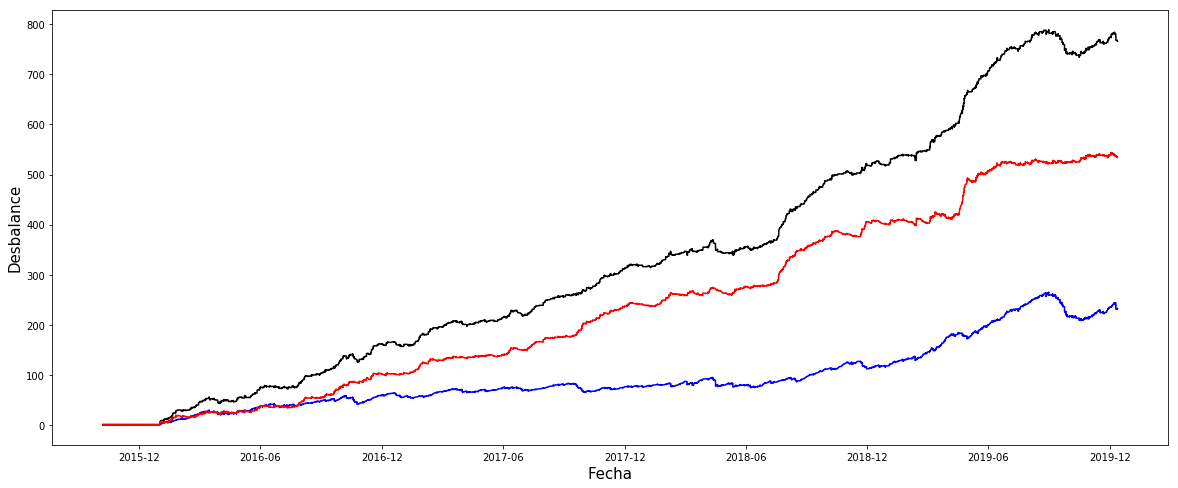

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('penal_df.csv')
df['exp_fecsor'] = pd.to_datetime(df['exp_fecsor'])
df = df.sort_values(by=['exp_fecsor'], ascending=True)
causas=np.zeros(31)
desbalance = []
desbalance_prom_min = []
desbalance_prom_max = []
fecha = []
jj = 0
for ii in range(len(df)):
    if 'JUZP' in df.org_cod_pri.iloc[ii]:
        causas[int(df.org_cod_pri.iloc[ii][4:6])-1] += 1
        desbalance.append(np.max(causas)-np.min(causas))
        desbalance_prom_min.append(np.mean(causas)-np.min(causas))
        desbalance_prom_max.append(np.max(causas)-np.mean(causas))        
        fecha.append(df.exp_fecsor.iloc[ii])  
           
ifig, ax = plt.subplots(figsize=(20, 8))        
plt.plot(fecha,desbalance,'k-')
plt.plot(fecha,desbalance_prom_min,'b-')
plt.plot(fecha,desbalance_prom_max,'r-')
ax.set_xlabel('Fecha', fontsize=15)
ax.set_ylabel('Desbalance', fontsize=15)

El inconveniete que tiene estoy es que las causas se van acumulando, pero puede ser que alguna ya esté cerrada o se cierre durante el período que estamos analizando. Entonces esas causas que se van cerrando, habría que ir restándolas de la carga de trabajo del juzgado.